In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [3]:
df = pd.read_csv('student-mat.csv')

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

We can see that there are no null values in our dataset. If it had null value, we would have to fill it with the mean or median of the column.

In [7]:
# Dealing with duplicate data
print(df.duplicated().sum())

0


There are no duplicate values in our dataset. If there were, we would have to remove them.

In [8]:
# Selecting columns with categorical df and count unique values
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f'Column: {col}, Unique Values: {df[col].nunique()}')
    
print(len(categorical_columns))


Column: school, Unique Values: 2
Column: sex, Unique Values: 2
Column: address, Unique Values: 2
Column: famsize, Unique Values: 2
Column: Pstatus, Unique Values: 2
Column: Mjob, Unique Values: 5
Column: Fjob, Unique Values: 5
Column: reason, Unique Values: 4
Column: guardian, Unique Values: 3
Column: schoolsup, Unique Values: 2
Column: famsup, Unique Values: 2
Column: paid, Unique Values: 2
Column: activities, Unique Values: 2
Column: nursery, Unique Values: 2
Column: higher, Unique Values: 2
Column: internet, Unique Values: 2
Column: romantic, Unique Values: 2
17


17 of the 33 columns have categorical values. We will have to convert them to numerical values.
We will use the OneHotEncoder to convert the categorical values to numerical values as most of the categorical columns have less than 5 unique values.

In [9]:
# # One-hot encode categorical columns and drop the first column for each category to avoid multicollinearity
# df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# boolean_columns = df_encoded.select_dtypes(include=['bool']).columns
# df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)

# df_encoded.head()


c:\Users\Cherish\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Cherish\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


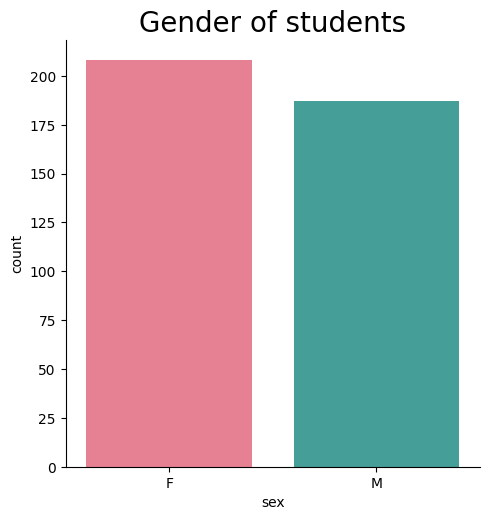

In [10]:
sns.catplot(x="sex", kind="count", data=df, palette="husl",hue='sex')
plt.title("Gender of students", fontsize = 20)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

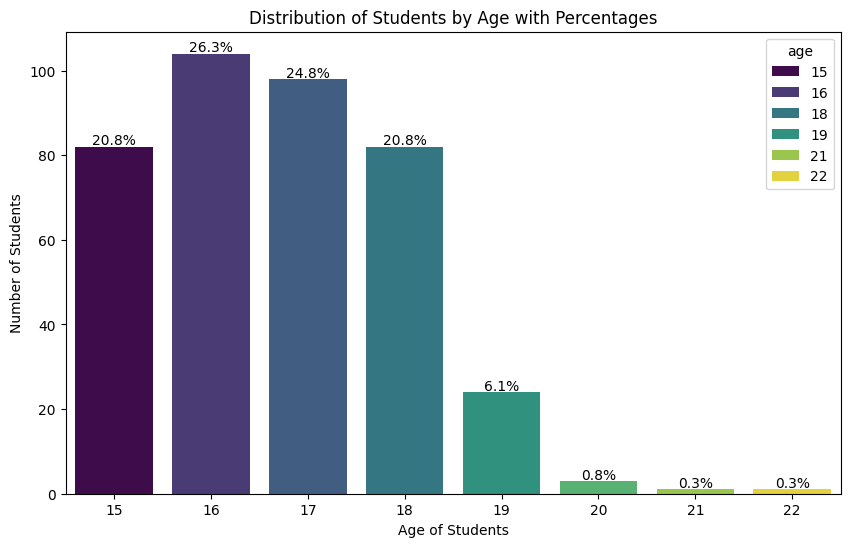

In [11]:
# Analysing the distribution of students by age

import matplotlib.pyplot as plt
import seaborn as sns

ages = df["age"].value_counts().sort_index()
percentages = (ages / ages.sum()) * 100 

plt.figure(figsize=(10, 6))
sns.barplot(x=ages.index, y=ages.values, palette="viridis", hue=ages.index)

plt.xlabel("Age of Students")
plt.ylabel("Number of Students")
plt.title("Distribution of Students by Age with Percentages")

for i, (value, percentage) in enumerate(zip(ages.values, percentages)):
    plt.text(i, value + 0.5, f'{percentage:.1f}%', ha='center', fontsize=10)

plt.show()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


C:\Users\Cherish\AppData\Local\Temp\ipykernel_35252\2114968172.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '< 2 hours' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['studytime'] == 1, 'st_time'] = '< 2 hours'


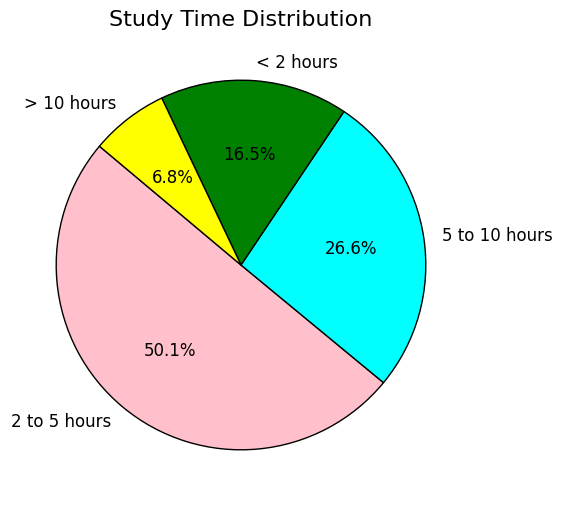

In [12]:
df['st_time'] = np.nan

# Map studytime to time ranges
df.loc[df['studytime'] == 1, 'st_time'] = '< 2 hours'
df.loc[df['studytime'] == 2, 'st_time'] = '2 to 5 hours'
df.loc[df['studytime'] == 3, 'st_time'] = '5 to 10 hours'
df.loc[df['studytime'] == 4, 'st_time'] = '> 10 hours'

# Get labels and counts for the pie chart
labels = df["st_time"].unique().tolist()
amount = df["st_time"].value_counts().tolist()

# Define colors for each slice
colors = ["pink", "cyan", "green", "yellow"]

# Create a pie chart using matplotlib
plt.figure(figsize=(8, 6))
plt.pie(amount, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'), textprops=dict(fontsize=12))

# Add title
plt.title("Study Time Distribution", fontsize=16)

# Show the plot
plt.show()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

<Axes: title={'center': 'Box plot for final grades,depending on the study time'}, xlabel='G3', ylabel='st_time'>

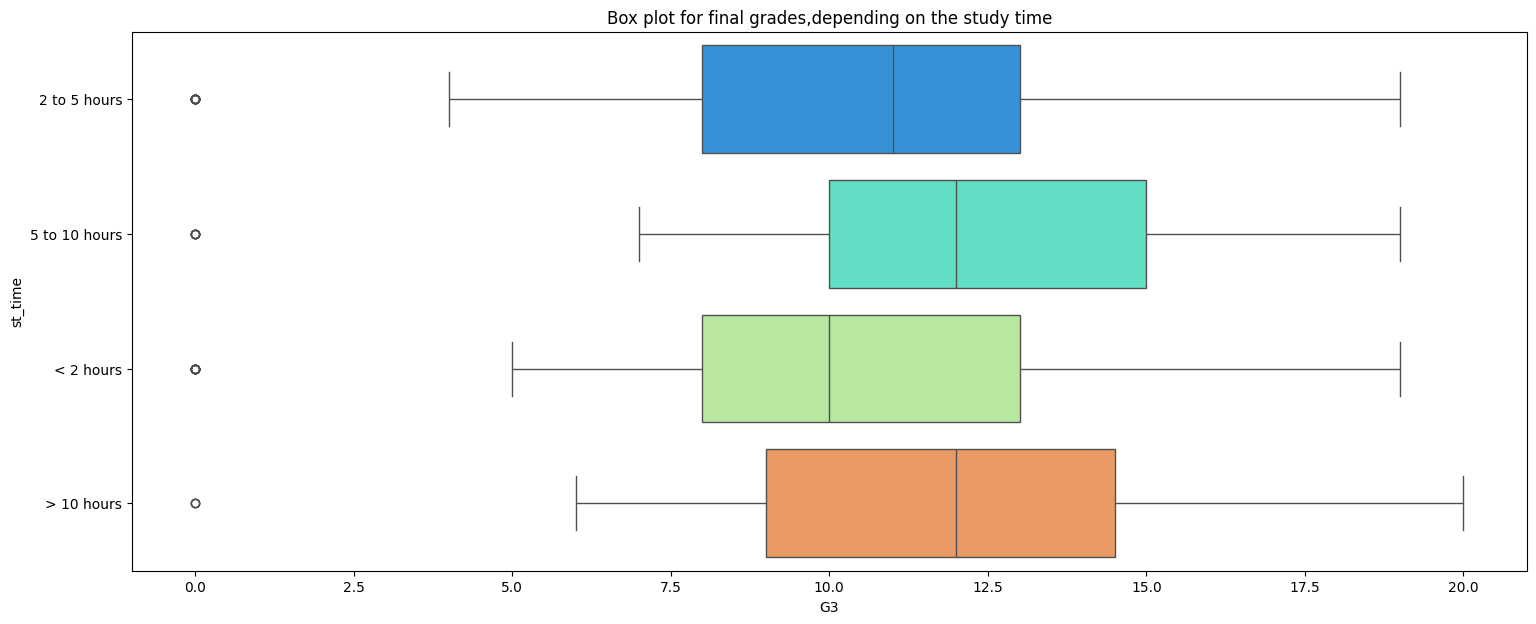

In [13]:
# Creating a box plot for final grades, depending on the study time

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

plt.figure(figsize=(18,7))
plt.title("Box plot for final grades,depending on the study time")
sns.boxplot(y="st_time", x="G3", data = df , orient="h", palette = 'rainbow', hue="st_time")

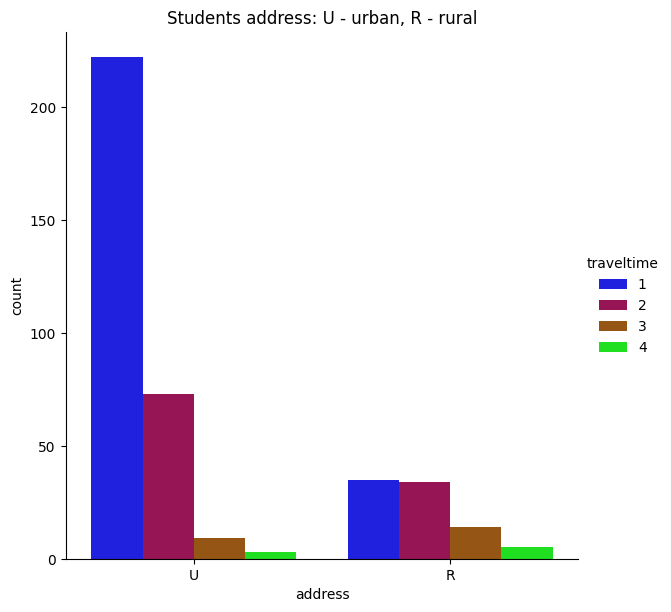

In [14]:
# Creating a bar plot for students by area they live in and travel time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

sns.catplot(x="address", kind="count", hue="traveltime", palette="brg", data=df, height=6)
plt.title("Students address: U - urban, R - rural")
plt.show()

Most of the students live in urban areas. We can see that the majority of the students take less time to travel to school.

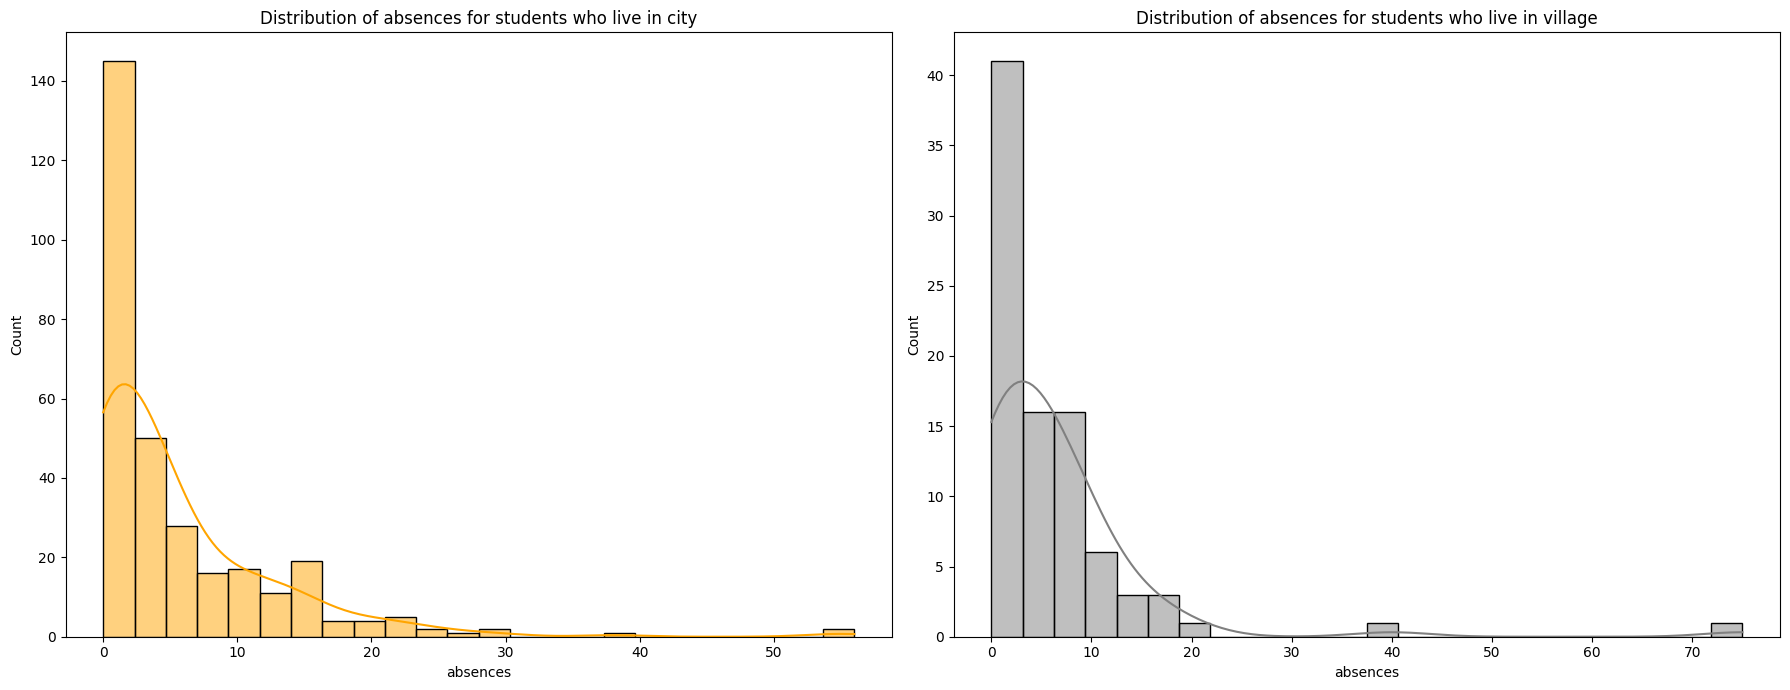

In [15]:
# Checking for absences by area of living
f = plt.figure(figsize=(18, 7))

ax1 = f.add_subplot(121)
sns.histplot(df[df['address'] == 'U']['absences'], color='orange', kde=True, ax=ax1)
ax1.set_title('Distribution of absences for students who live in city')

ax2 = f.add_subplot(122)
sns.histplot(df[df['address'] == 'R']['absences'], color='gray', kde=True, ax=ax2)
ax2.set_title('Distribution of absences for students who live in village')

plt.tight_layout()
plt.show()


Although some students living in the village have a high number of absences, we cannot definitively attribute this to their rural residence. It could be influenced by factors such as traffic congestion or an inadequate transportation schedule.

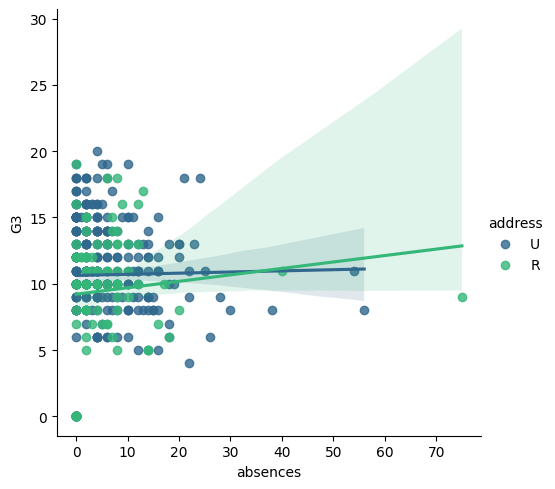

In [16]:
sns.lmplot(x="absences", y="G3",hue = 'address',data=df, palette = 'viridis')


Let's study the impact of romantic relationships on students' grades as at this age, students are more likely to be influenced by their romantic relationships.

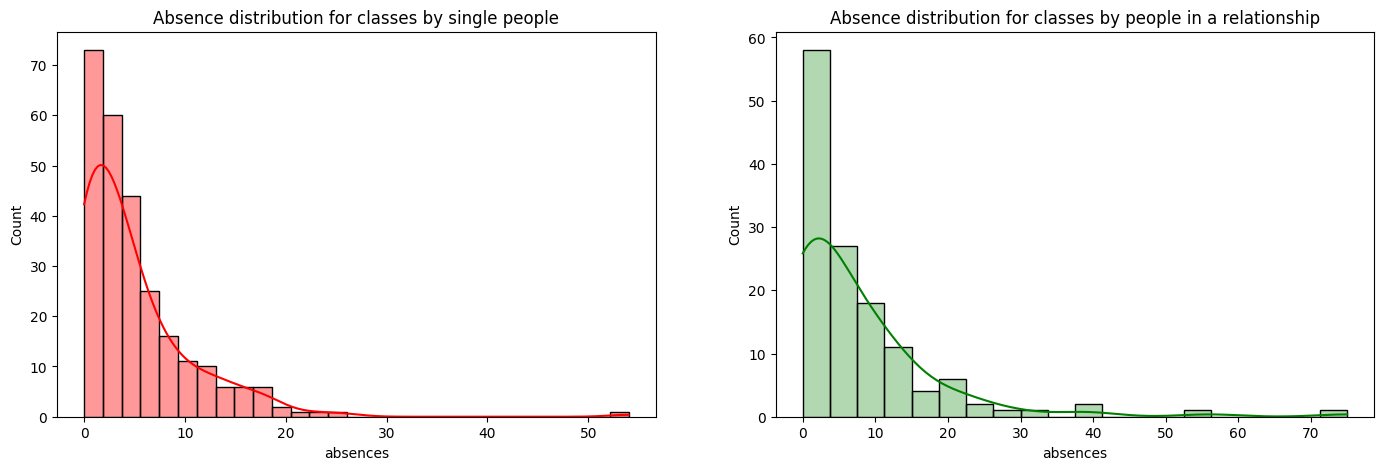

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

f = plt.figure(figsize=(17, 5))

ax = f.add_subplot(121)
sns.histplot(df[df.romantic == 'no']["absences"], color='red', ax=ax, kde=True, alpha=0.4)
ax.set_title('Absence distribution for classes by single people')

ax = f.add_subplot(122)
sns.histplot(df[df.romantic == 'yes']["absences"], color='green', ax=ax, kde=True, alpha=0.3)
ax.set_title('Absence distribution for classes by people in a relationship')

plt.show()


It is evident that single people have fewwr absences than those in a relationship.

Text(0.5, 1.0, 'How many students are in a romantic relationship?')

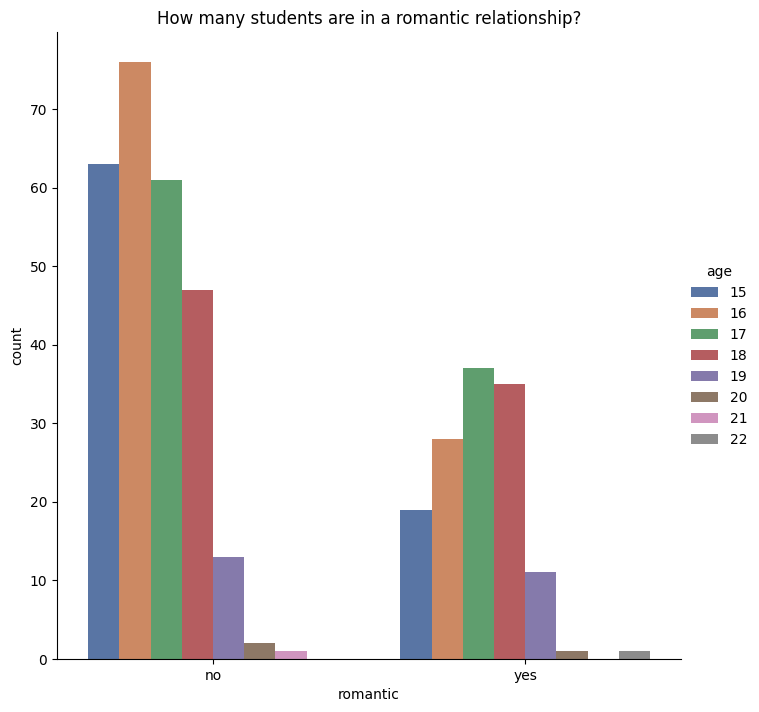

In [18]:
# Distribution of people in relationships and single people by age

sns.catplot(x="romantic", kind="count",palette="deep", data=df, height = 7, hue='age')
plt.title("How many students are in a romantic relationship?")

Text(0.5, 1.0, 'Distribution of grades in people in love')

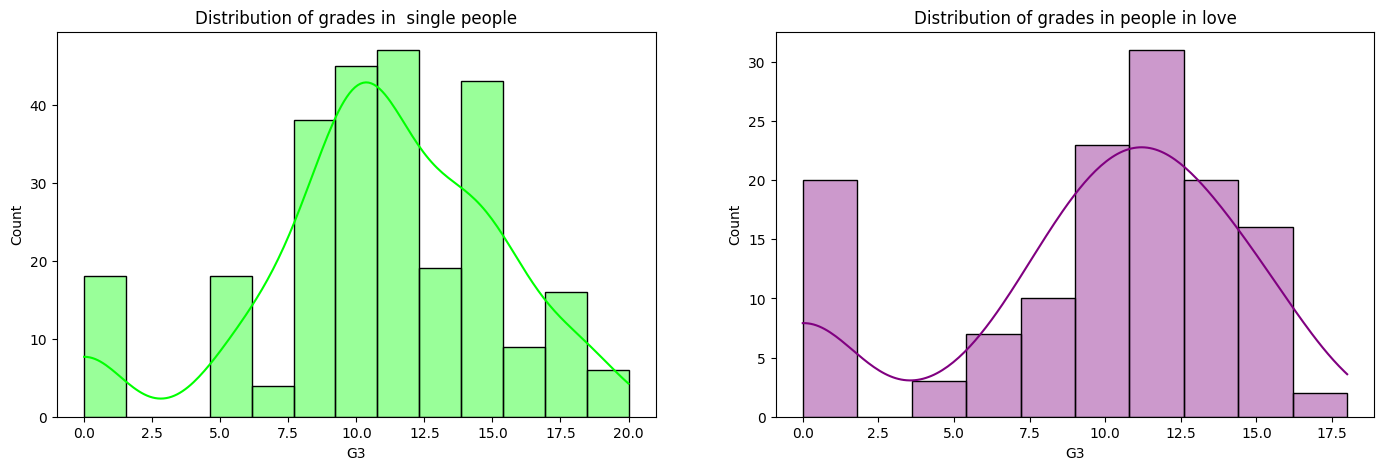

In [19]:
# seeing the effect of relationship status on final grades

f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.histplot(df[(df.romantic == 'no')]["G3"],color='lime',ax=ax,kde=True,alpha=0.4)
ax.set_title('Distribution of grades in  single people')

ax=f.add_subplot(122)
sns.histplot(df[(df.romantic == 'yes')]['G3'],color='purple',ax=ax, alpha=0.4,kde=True)
ax.set_title('Distribution of grades in people in love')

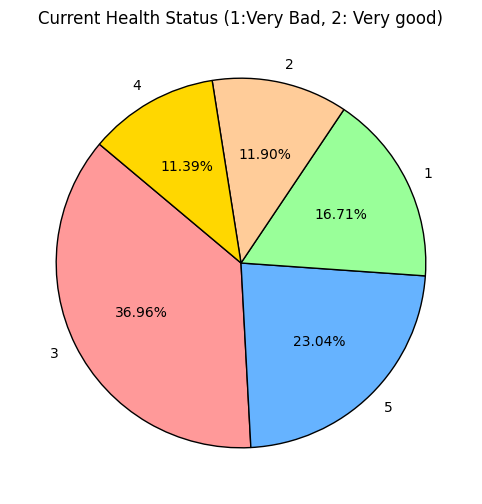

In [20]:
labels = df["health"].unique().tolist()
amount = df["health"].value_counts().tolist()

colors = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99", "#FFD700"]  # Light red, blue, green, light orange, gold

plt.figure(figsize=(8, 6))
plt.pie(amount, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140,wedgeprops=dict(edgecolor='black'), textprops=dict(fontsize=10))


plt.title("Current Health Status (1:Very Bad, 2: Very good)")

plt.show()


<Axes: title={'center': 'Box plot for final grades,depending on current health'}, xlabel='G3', ylabel='health'>

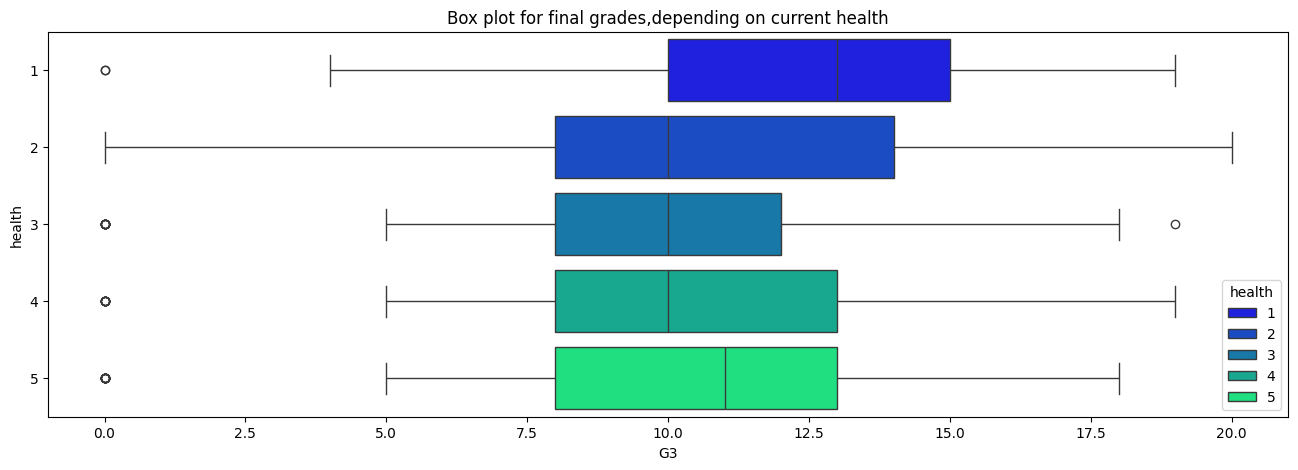

In [21]:
# Creating a box plot for final grades, depending on the current health 
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on current health")
sns.boxplot(y="health", x="G3", data = df , orient="h", palette = 'winter', hue="health")

Students with good health do have better grades.

We have data on students' alcohol consumption during weekdays ("Dalc") and weekends ("Walc"). Our interest is to determine if alcohol consumption impacts academic success.

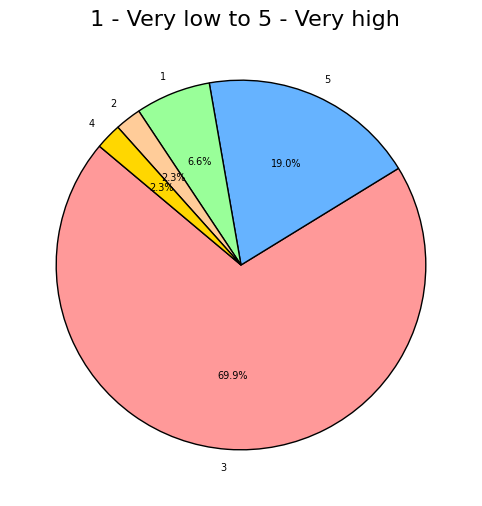

In [22]:
lenabels = df["Dalc"].unique().tolist()
amount = df["Dalc"].value_counts().tolist()

colors = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99", "#FFD700"]

plt.figure(figsize=(8, 6))
plt.pie(amount, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'), textprops=dict(fontsize=7))

plt.title(" 1 - Very low to 5 - Very high", fontsize=16)

plt.show()


Most students prefer to be sober on weekdays

Text(0.5, 1.0, 'Distribution of grades for people who consume little alcohol on weekdays')

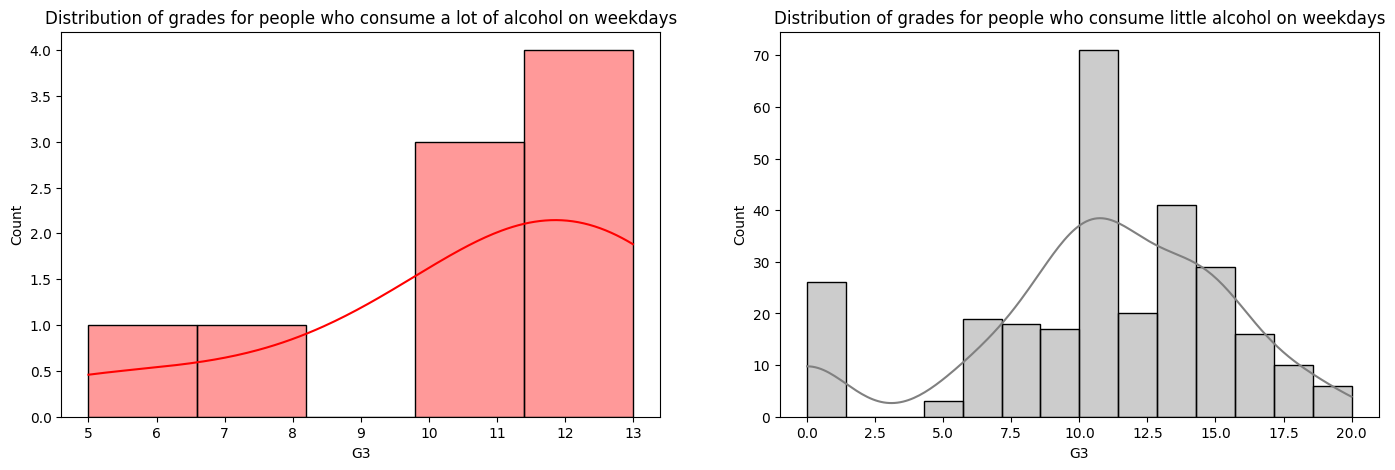

In [23]:
# Comparing drinking on weekdays with the final grades
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.histplot(df[(df.Dalc == 5)]["G3"],color='red',ax=ax, kde=True, alpha=0.4)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekdays')

ax=f.add_subplot(122)
sns.histplot(df[(df.Dalc == 1)]['G3'],color='gray',ax=ax, alpha=0.4,kde=True)
ax.set_title('Distribution of grades for people who consume little alcohol on weekdays')

Drinking on working days is leading to lower grades for students.

Text(0.5, 1.0, 'Distribution of grades for people who consume little alcohol on weekend')

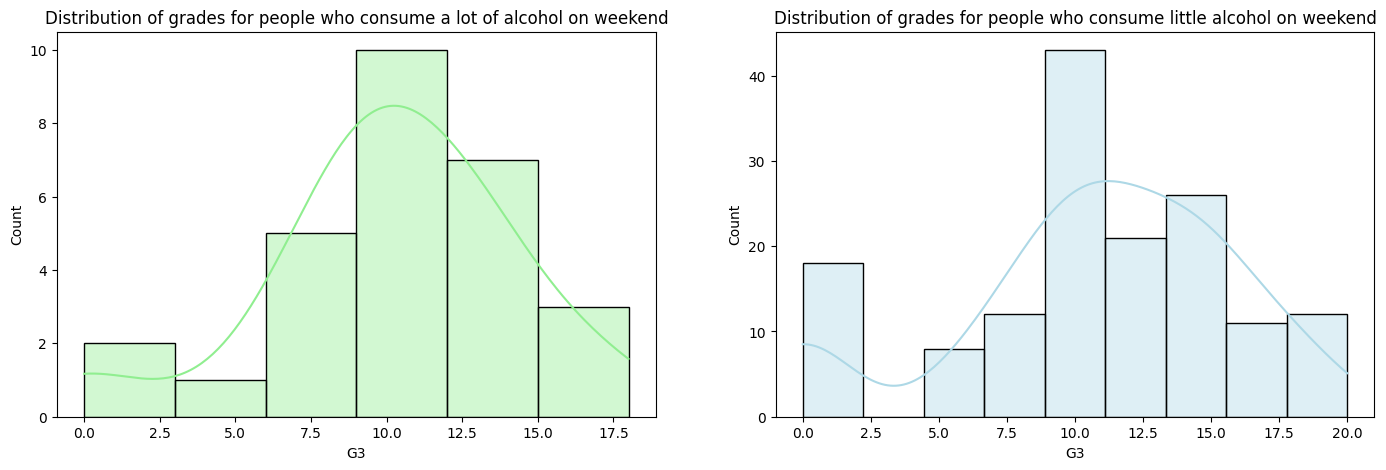

In [24]:
# Now looking for the effect on people who drink on weekends
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.histplot(df[(df.Walc == 5)]["G3"],color='lightgreen',ax=ax, kde=True, alpha=0.4)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekend')

ax=f.add_subplot(122)
sns.histplot(df[(df.Walc == 1)]['G3'],color='lightblue',ax=ax, kde=True, alpha=0.4)
ax.set_title('Distribution of grades for people who consume little alcohol on weekend')

It seems like drinking on weekends is not affecting the grades of students.
(Doesn't mean you should start drinking)

Text(0.5, 1.0, 'Want to get higher education?')

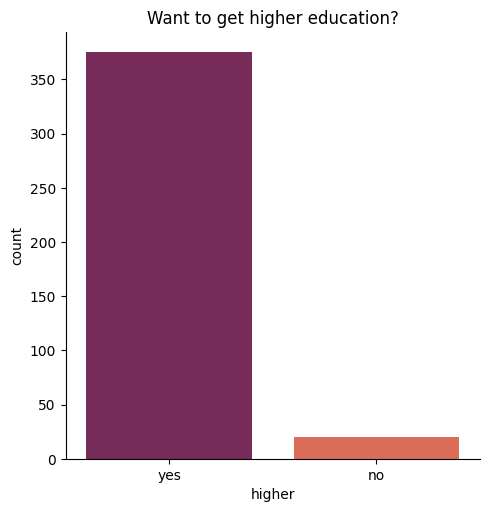

In [25]:
# looking at the desire for higher education aspect
sns.catplot(x="higher", kind="count",palette="rocket", data=df, height = 5 , hue='higher')
plt.title("Want to get higher education?")

Most of the students want to pursue higher education.

Text(0.5, 1.0, 'Distribution of grades for students who does not want to get higher education')

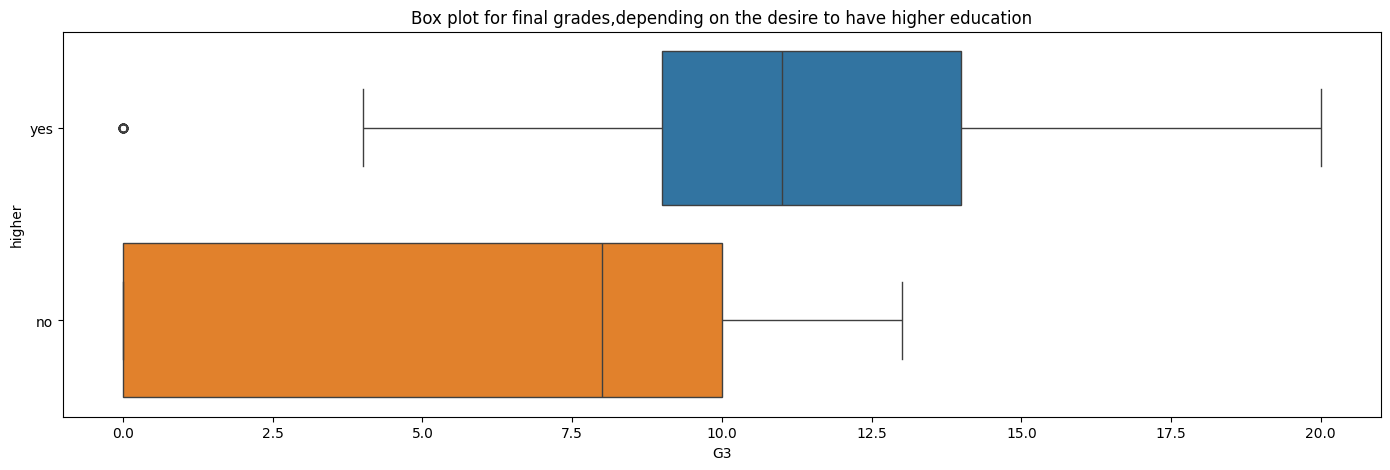

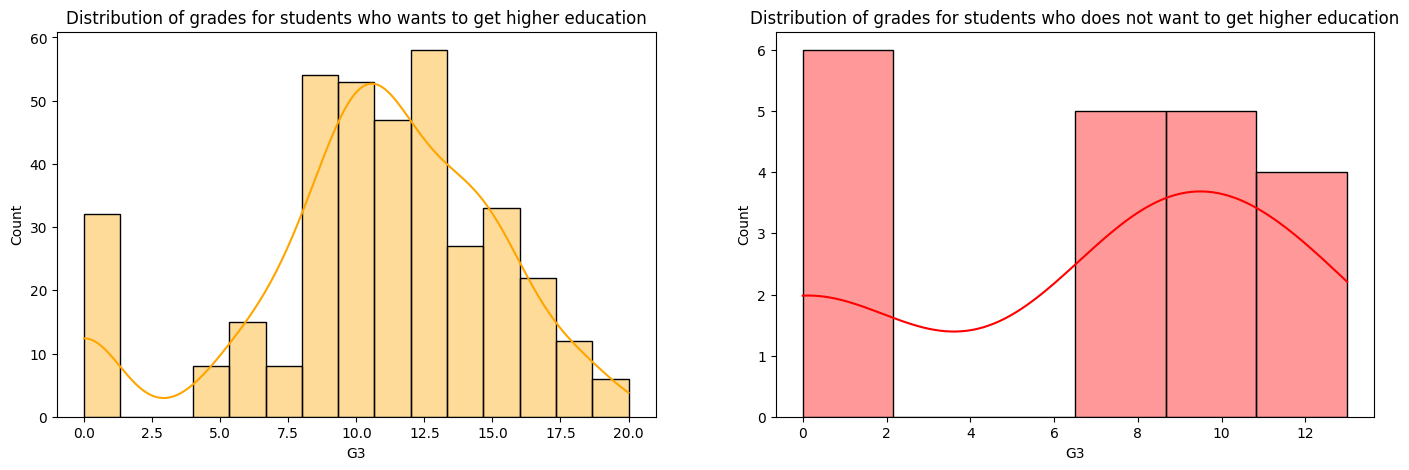

In [26]:
# What is the effect on grades?
plt.figure(figsize=(17,5))
plt.title("Box plot for final grades,depending on the desire to have higher education")
sns.boxplot(y="higher", x="G3", data = df , orient="h", palette = 'tab10', hue="higher")

f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.histplot(df[(df.higher == 'yes')]["G3"],color='orange',ax=ax, kde=True, alpha=0.4)
ax.set_title('Distribution of grades for students who wants to get higher education')

ax=f.add_subplot(122)
sns.histplot(df[(df.higher == 'no')]['G3'],color='red',ax=ax, alpha=0.4,kde=True)
ax.set_title('Distribution of grades for students who does not want to get higher education')

Wanting to pursue higher education is leading to better grades for students.

Text(0.5, 1.0, 'GT3: >3, LE3: <3')

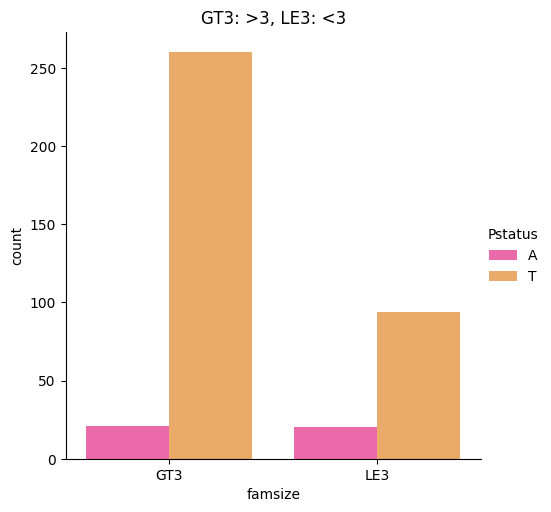

In [27]:
# Let's look at the effect family situation has on the final grades?
sns.catplot(x="famsize", kind="count",hue = "Pstatus",palette="spring", data=df, height = 5)
plt.title("GT3: >3, LE3: <3")

Most of the students are living with their parents.

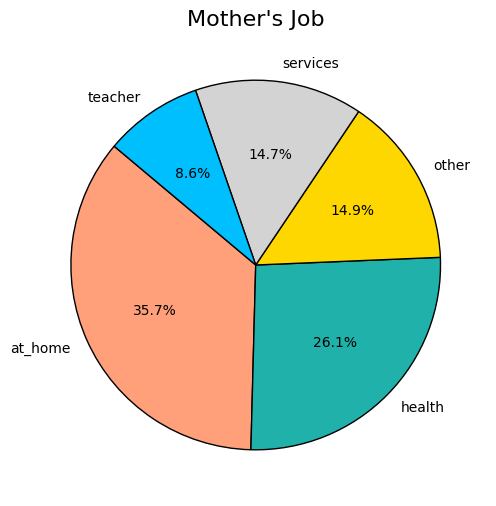

In [28]:
labels = df["Mjob"].unique().tolist()
amount = df["Mjob"].value_counts().tolist()

colors = ["#FFA07A", "#20B2AA", "#FFD700", "#D3D3D3", "#00BFFF"] 

plt.figure(figsize=(8, 6))
plt.pie(amount, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,wedgeprops=dict(edgecolor='black'), textprops=dict(fontsize=10))

plt.title("Mother's Job", fontsize=16)

plt.show()


Most mothers are housewives.

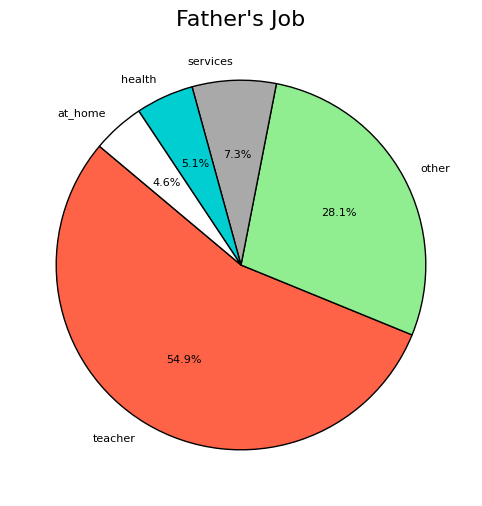

In [29]:
labels = df["Fjob"].unique().tolist()
amount = df["Fjob"].value_counts().tolist()

colors = ["#FF6347", "#90EE90", "#A9A9A9", "#00CED1", "#FFFFFF"] 

plt.figure(figsize=(8, 6))
plt.pie(amount, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,wedgeprops=dict(edgecolor='black'), textprops=dict(fontsize=8))

plt.title("Father's Job", fontsize=16)

plt.show()


<Axes: title={'center': 'Box plot for final grades,depending on fathers profession'}, xlabel='G3', ylabel='Fjob'>

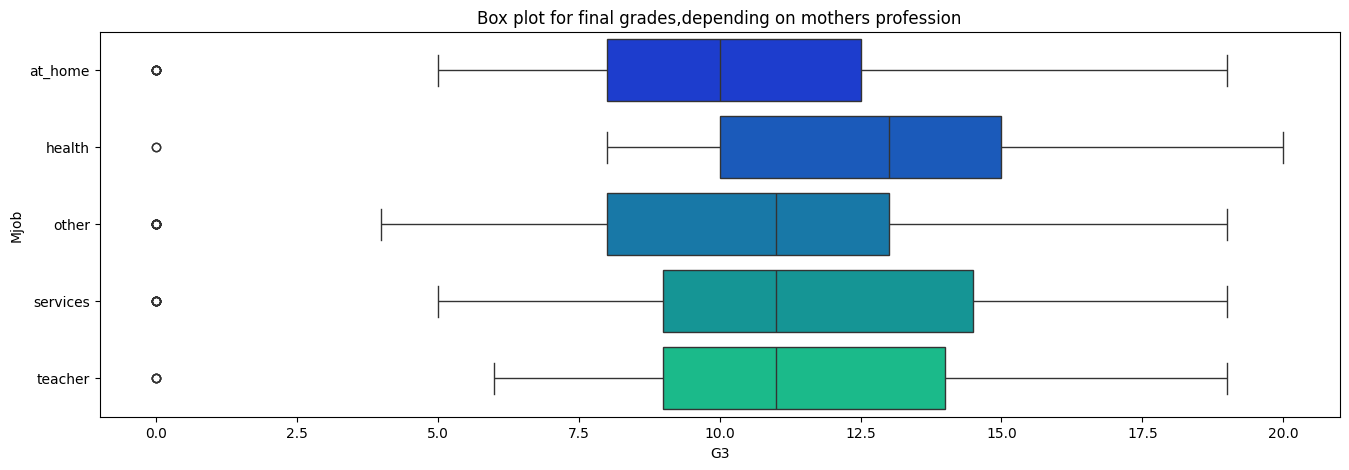

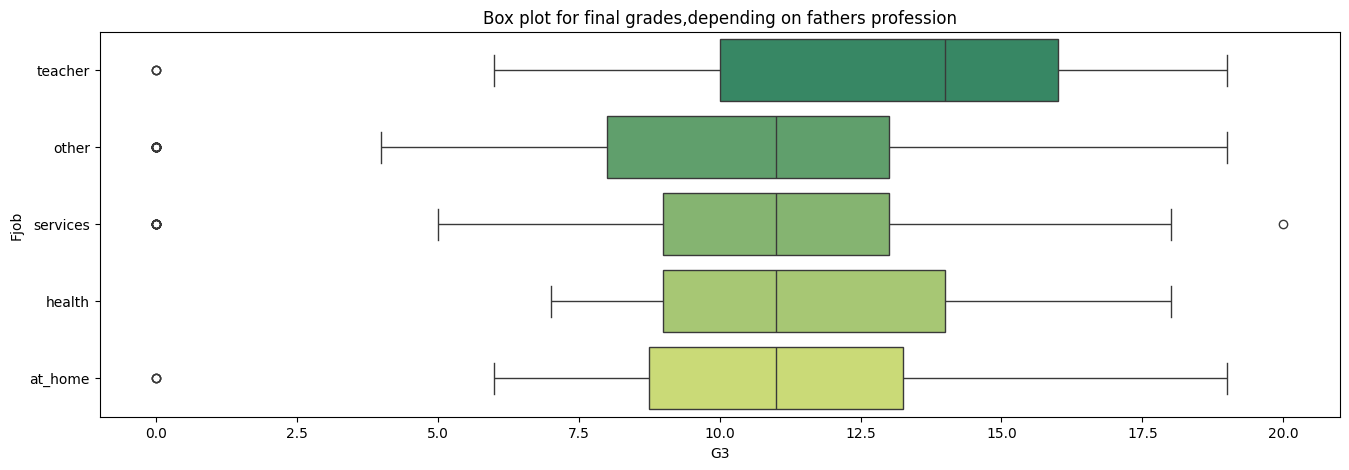

In [30]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on mothers profession")
sns.boxplot(y="Mjob", x="G3", data = df , orient="h", palette = 'winter',hue="Mjob")

plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on fathers profession")
sns.boxplot(y="Fjob", x="G3", data = df , orient="h", palette = 'summer',hue="Fjob")

It seems that mothers working in medicine lead to better grades for students in maths.

Let's code categorical features and look at the correlation between the features.
We will use "Label Encoder "for binary features.

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

le.fit(df.address.drop_duplicates()) 
df.address = le.transform(df.address)

le.fit(df.famsize.drop_duplicates()) 
df.famsize = le.transform(df.famsize)

le.fit(df.Pstatus.drop_duplicates()) 
df.Pstatus = le.transform(df.Pstatus)

le.fit(df.schoolsup.drop_duplicates()) 
df.schoolsup = le.transform(df.schoolsup)

le.fit(df.famsup.drop_duplicates()) 
df.famsup = le.transform(df.famsup)

le.fit(df.paid.drop_duplicates()) 
df.paid = le.transform(df.paid)

le.fit(df.activities.drop_duplicates()) 
df.activities = le.transform(df.activities)

le.fit(df.nursery.drop_duplicates()) 
df.nursery = le.transform(df.nursery)

le.fit(df.higher.drop_duplicates()) 
df.higher = le.transform(df.higher)

le.fit(df.romantic.drop_duplicates()) 
df.romantic = le.transform(df.romantic)

le.fit(df.internet.drop_duplicates()) 
df.internet = le.transform(df.internet)

In [33]:
data = df.drop(["st_time"], axis = 1) # Dropping the study time column

In [34]:
#not binary features
data= pd.get_dummies(df)
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,st_time_2 to 5 hours,st_time_5 to 10 hours,st_time_< 2 hours,st_time_> 10 hours
0,0,18,1,0,0,4,4,2,2,0,...,False,False,False,False,True,False,True,False,False,False
1,0,17,1,0,1,1,1,1,2,0,...,False,False,False,True,False,False,True,False,False,False
2,0,15,1,1,1,1,1,1,2,3,...,False,True,False,False,True,False,True,False,False,False
3,0,15,1,0,1,4,2,1,3,0,...,True,False,False,False,True,False,False,True,False,False
4,0,16,1,0,1,3,3,1,2,0,...,True,False,False,True,False,False,True,False,False,False


Looking at the correlation matrix, we can see that the features are not highly correlated with each other.

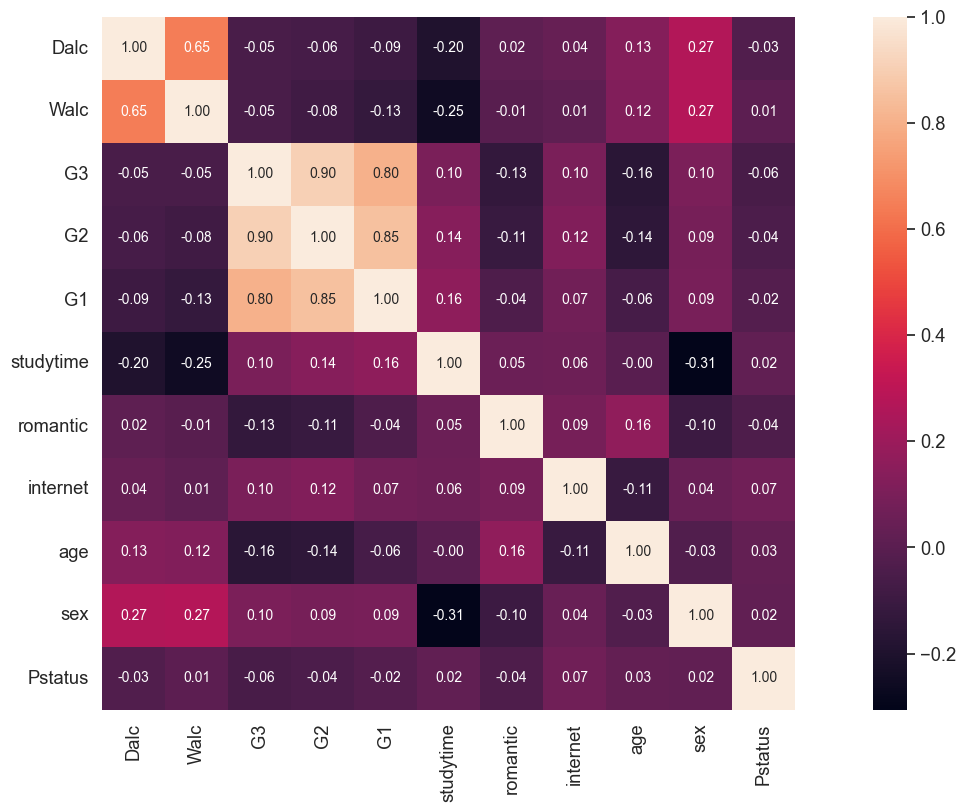

In [35]:
plt.figure(figsize=(20,9))
cols = ['Dalc','Walc','G3','G2', 'G1','studytime','romantic','internet','age','sex','Pstatus']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.2)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':10}, yticklabels = cols, xticklabels = cols)

This is a correlation matrix of all the features used to find the relation between each other and the dependecy on each other.